###Importing Library

In [1]:
# !pip install owlready

In [1]:
import warnings
warnings.filterwarnings('ignore')


import re
from owlready2 import get_ontology
from nltk.stem import PorterStemmer
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import joblib
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np 
import joblib
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


### Reading ontology file

In [ ]:
# Step 1: Load the OWL file (treating txt as OWL)
# OntologiaEmbrapa_2015-05-30.owl
ontology_file = "OntologiaEmbrapa_2015-05-30.owl"  # Your OWL file saved as .txt
ontfile= 'MaCOntoFile.OWL'

onto = get_ontology(f"file://{ontology_file}").load(only_local=True)

: 

In [3]:
onto.classes

<bound method _GraphManager.classes of get_ontology("http://www.owl-ontologies.com/Ontology1349727556.owl#")>

In [4]:
raw_doc = list(onto.classes())[:]
raw_doc[:20]

* Owlready2 * Warning: ignoring cyclic type of, involving storid 459



[OntologiaEmbrapa_2015-05-30.BodyOfWater,
 OntologiaEmbrapa_2015-05-30.Water,
 OntologiaEmbrapa_2015-05-30.Evaporation,
 OntologiaEmbrapa_2015-05-30.WaterQuantityPhysicalMeasure,
 OntologiaEmbrapa_2015-05-30.Biome,
 OntologiaEmbrapa_2015-05-30.EnvironmentalTransformation,
 OntologiaEmbrapa_2015-05-30.EnvironmentalTransformationAgent,
 OntologiaEmbrapa_2015-05-30.ChemicalWaterIndicator,
 OntologiaEmbrapa_2015-05-30.WaterQualityChemicalMeasure,
 OntologiaEmbrapa_2015-05-30.MesoRegiao,
 OntologiaEmbrapa_2015-05-30.MicroRegiao,
 OntologiaEmbrapa_2015-05-30.Municipio,
 OntologiaEmbrapa_2015-05-30.RegiaoGeopolitica,
 OntologiaEmbrapa_2015-05-30.UnidadeDaFederacao,
 OntologiaEmbrapa_2015-05-30.Event,
 OntologiaEmbrapa_2015-05-30.InformationResource,
 OntologiaEmbrapa_2015-05-30.Seca,
 OntologiaEmbrapa_2015-05-30.SpaceTemporal_Extension,
 OntologiaEmbrapa_2015-05-30.Amostra,
 OntologiaEmbrapa_2015-05-30.Coleta]

In [5]:
sample = raw_doc[4]
sample

OntologiaEmbrapa_2015-05-30.Biome

In [6]:
# Iterate over object properties and display domain, property, and range
raw_doc = []

for obj_prop in onto.object_properties():
    domain = obj_prop.domain
    range_ = obj_prop.range
    
    # Handle cases where domain or range might not be explicitly set
    try: 
        domain_name = domain[0].name if domain else "Undefined"
        range_name = range_[0].name if range_ else "Undefined"
        
        # print(f" {domain_name} {obj_prop.name}  {range_name}.")
        raw_doc.append(f"{domain_name} {obj_prop.name}  {range_name}")
    except:
        pass


doc = raw_doc[:]
doc

['BodyOfWater accumulatesWater  Water',
 'WaterQuantityPhysicalMeasure actualEvapotranspiration  Evaporation',
 'WaterQuantityPhysicalMeasure waterEvaporation  Evaporation',
 'WaterQuantityPhysicalMeasure actualWaterEvaporation  Evaporation',
 'Biome bioma_contem_Corpo_de_Agua  BodyOfWater',
 'EnvironmentalTransformationAgent causa_TransformacaoAmbiental  EnvironmentalTransformation',
 'WaterQualityChemicalMeasure concentracaoQuimicadaAgua  ChemicalWaterIndicator',
 'MesoRegiao contemMesoRegiaoMicroRegiao  MicroRegiao',
 'MicroRegiao contemMicroRegiaoMunicipio  Municipio',
 'RegiaoGeopolitica contemRegiaoGeopoliticaUF  UnidadeDaFederacao',
 'UnidadeDaFederacao fazParteUFRegiaoGeopolitica  RegiaoGeopolitica',
 'UnidadeDaFederacao contemUFMesoRegiao  MesoRegiao',
 'UnidadeDaFederacao contemUFMunicipio  Municipio',
 'EnvironmentalTransformation decorredeEventos  Event',
 'Event eventosdaTransformacaoAmbiental  EnvironmentalTransformation',
 'InformationResource describe  Event',
 'Seca dr

In [6]:
# initiating potter stemmer
ps  = PorterStemmer()

In [8]:
# romove same work occuring side by side
def remove_consecutive_duplicates(words):
    result = []
    for i, word in enumerate(words):
        # Add the word only if it's not the same as the previous word
        if i == 0 or word != words[i - 1]:
            result.append(word)
    return result

# clean single doc
def clean_doc(doc):
    # remove empty list
    clean = [samp for samp in doc.split(' ') if samp != '']

    # remove underscore
    clean_doc = []
    cln_data = ''
    for cln in clean: 
        cln_data = ' '.join(cln.split('_'))
        clean_doc.extend(cln_data.split(' '))

    # making first letter capital...
    clean_doc = ' '.join([cln_d[0].upper() + cln_d[1:] for cln_d in clean_doc])


    # Splitting based on Cap Text
    clean_doc = re.findall(r'[A-Z][a-z]*|[a-z]*[A-Z][a-z]*', clean_doc)
    # print(text)
    # remove side by side reoccuring word
    final_clean_document  = remove_consecutive_duplicates(clean_doc)    
    # convert all to small cap
    final_clean_document = [doc.lower() for doc in final_clean_document]

    return final_clean_document

# looping through the document in the 
# ontology file... 
def clean_docs(documents): 
    document = []
    for doc in documents:
        document.append(clean_doc(doc))
        
    return document

clean_docs = clean_docs(doc)
clean_docs[:5]

[['body', 'of', 'water', 'accumulates', 'water'],
 ['water',
  'quantity',
  'physical',
  'measure',
  'actual',
  'evapotranspiration',
  'evaporation'],
 ['water', 'quantity', 'physical', 'measure', 'water', 'evaporation'],
 ['water',
  'quantity',
  'physical',
  'measure',
  'actual',
  'water',
  'evaporation'],
 ['biome', 'bioma', 'contem', 'corpo', 'de', 'agua', 'body', 'of', 'water']]

In [9]:
# generating Structural table... 
data = {'ont_doc': doc, 'clean_doc': clean_docs}
dataset = pd.DataFrame(data)
dataset

,ont_doc,clean_doc
0,BodyOfWater accumulatesWater Water,"[body, of, water, accumulates, water]"
1,WaterQuantityPhysicalMeasure actualEvapotransp...,"[water, quantity, physical, measure, actual, e..."
2,WaterQuantityPhysicalMeasure waterEvaporation ...,"[water, quantity, physical, measure, water, ev..."
3,WaterQuantityPhysicalMeasure actualWaterEvapor...,"[water, quantity, physical, measure, actual, w..."
4,Biome bioma_contem_Corpo_de_Agua BodyOfWater,"[biome, bioma, contem, corpo, de, agua, body, ..."
...,...,...
77,TemporalDimension usa_ConvencaoTemporal TimeS...,"[temporal, dimension, usa, convencao, temporal..."
78,Altimetrical-BathymetricalExtension usa_Mensur...,"[altimetrical, bathymetrical, extension, usa, ..."
79,TemporalDimension usa_MensuracaoTemporal Time...,"[temporal, dimension, usa, mensuracao, tempora..."
80,WaterQualityBiologicalMeasure waterBiolgicalCo...,"[water, quality, biological, measure, water, b..."


In [10]:
# Function for tagging (providing intention)
def generate_tags(row):
    # Use 'ont_doc' to create intent tags
    intent = row['ont_doc'].split()[0]  # First word as intent
    
    # Tag entities in 'clean_doc' using BIO tagging
    entities = row['clean_doc']
    tagged_entities = []
    for word in entities:
        if word.lower() in intent.lower():
            tagged_entities.append((word, "B-ENTITY"))  # Beginning tag
        else:
            tagged_entities.append((word, "O"))  # Outside tag
    return intent, tagged_entities

# Apply tagging to the DataFrame
dataset['intent'], dataset['entity_tags'] = zip(*dataset.apply(generate_tags, axis=1))

dataset

,ont_doc,clean_doc,intent,entity_tags
0,BodyOfWater accumulatesWater Water,"[body, of, water, accumulates, water]",BodyOfWater,"[(body, B-ENTITY), (of, B-ENTITY), (water, B-E..."
1,WaterQuantityPhysicalMeasure actualEvapotransp...,"[water, quantity, physical, measure, actual, e...",WaterQuantityPhysicalMeasure,"[(water, B-ENTITY), (quantity, B-ENTITY), (phy..."
2,WaterQuantityPhysicalMeasure waterEvaporation ...,"[water, quantity, physical, measure, water, ev...",WaterQuantityPhysicalMeasure,"[(water, B-ENTITY), (quantity, B-ENTITY), (phy..."
3,WaterQuantityPhysicalMeasure actualWaterEvapor...,"[water, quantity, physical, measure, actual, w...",WaterQuantityPhysicalMeasure,"[(water, B-ENTITY), (quantity, B-ENTITY), (phy..."
4,Biome bioma_contem_Corpo_de_Agua BodyOfWater,"[biome, bioma, contem, corpo, de, agua, body, ...",Biome,"[(biome, B-ENTITY), (bioma, O), (contem, O), (..."
...,...,...,...,...
77,TemporalDimension usa_ConvencaoTemporal TimeS...,"[temporal, dimension, usa, convencao, temporal...",TemporalDimension,"[(temporal, B-ENTITY), (dimension, B-ENTITY), ..."
78,Altimetrical-BathymetricalExtension usa_Mensur...,"[altimetrical, bathymetrical, extension, usa, ...",Altimetrical-BathymetricalExtension,"[(altimetrical, B-ENTITY), (bathymetrical, B-E..."
79,TemporalDimension usa_MensuracaoTemporal Time...,"[temporal, dimension, usa, mensuracao, tempora...",TemporalDimension,"[(temporal, B-ENTITY), (dimension, B-ENTITY), ..."
80,WaterQualityBiologicalMeasure waterBiolgicalCo...,"[water, quality, biological, measure, water, b...",WaterQualityBiologicalMeasure,"[(water, B-ENTITY), (quality, B-ENTITY), (biol..."


In [11]:
dataset['final_doc'] = [' '.join(row) for row in dataset.clean_doc]
dataset.head(2)

,ont_doc,clean_doc,intent,entity_tags,final_doc
0,BodyOfWater accumulatesWater Water,"[body, of, water, accumulates, water]",BodyOfWater,"[(body, B-ENTITY), (of, B-ENTITY), (water, B-E...",body of water accumulates water
1,WaterQuantityPhysicalMeasure actualEvapotransp...,"[water, quantity, physical, measure, actual, e...",WaterQuantityPhysicalMeasure,"[(water, B-ENTITY), (quantity, B-ENTITY), (phy...",water quantity physical measure actual evapotr...


#### Processing Ontology Operation

In [12]:
# stem function
def stem_text(texts): 
    # data = [ps.stem(txt) for txt in texts]
    return ' '.join([ps.stem(txt) for txt in texts.split()])


def join_text(texts): 
    return ' '.join([txt for txt in texts])
    

In [ ]:
dataset.final_doc = dataset['final_doc'].apply(lambda x:stem_text(x))
dataset.clean_doc = dataset['clean_doc'].apply(lambda x:join_text(x))
dataset.head(2)

,ont_doc,clean_doc,intent,entity_tags,final_doc
0,BodyOfWater accumulatesWater Water,body of water accumulates water,BodyOfWater,"[(body, B-ENTITY), (of, B-ENTITY), (water, B-E...",bodi of water accumul water
1,WaterQuantityPhysicalMeasure actualEvapotransp...,water quantity physical measure actual evapotr...,WaterQuantityPhysicalMeasure,"[(water, B-ENTITY), (quantity, B-ENTITY), (phy...",water quantiti physic measur actual evapotrans...


In [14]:
dataset.drop(columns=['entity_tags'], inplace=True)

In [15]:
print(dataset.shape)
dataset.head()

(82, 4)


,ont_doc,clean_doc,intent,final_doc
0,BodyOfWater accumulatesWater Water,body of water accumulates water,BodyOfWater,bodi of water accumul water
1,WaterQuantityPhysicalMeasure actualEvapotransp...,water quantity physical measure actual evapotr...,WaterQuantityPhysicalMeasure,water quantiti physic measur actual evapotrans...
2,WaterQuantityPhysicalMeasure waterEvaporation ...,water quantity physical measure water evaporation,WaterQuantityPhysicalMeasure,water quantiti physic measur water evapor
3,WaterQuantityPhysicalMeasure actualWaterEvapor...,water quantity physical measure actual water e...,WaterQuantityPhysicalMeasure,water quantiti physic measur actual water evapor
4,Biome bioma_contem_Corpo_de_Agua BodyOfWater,biome bioma contem corpo de agua body of water,Biome,biom bioma contem corpo de agua bodi of water


In [16]:
dataset.final_doc

0                           bodi of water accumul water
1     water quantiti physic measur actual evapotrans...
2             water quantiti physic measur water evapor
3      water quantiti physic measur actual water evapor
4         biom bioma contem corpo de agua bodi of water
                            ...                        
77     tempor dimens usa convencao tempor time standard
78    altimetr bathymetr extens usa mensuracao espac...
79      tempor dimens usa mensuracao tempor time measur
80    water qualiti biolog measur water biolgic comu...
81    water quantiti physic measur waterflow storm d...
Name: final_doc, Length: 82, dtype: object

<Axes: >

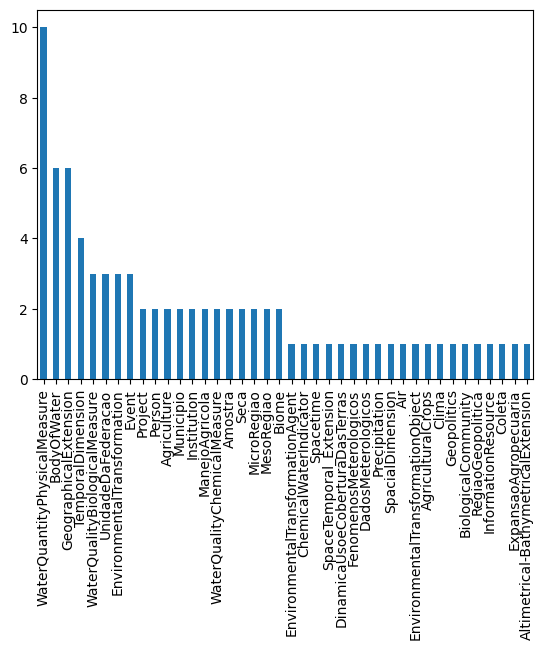

In [17]:
dataset.intent.value_counts().plot(kind='bar')

#### Machine Learning CountVectorization or TFIDF extraction

In [18]:
# FEATURE EXTRACTION 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [19]:
# TF - IDF implementation 
idf = TfidfVectorizer()
vocab = idf.fit(dataset.final_doc)
idf_vec = vocab.fit_transform(dataset.final_doc)
idf_vec.toarray()

array([[0.59095607, 0.        , 0.        , ..., 0.        , 0.56042846,
        0.        ],
       [0.        , 0.47900722, 0.        , ..., 0.        , 0.24844822,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.6020471 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3743718 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24302957,
        0.51253571]])

In [20]:
pd.DataFrame(idf_vec.toarray(), columns=[vocab.get_feature_names_out()])

,accumul,actual,agent,agricola,agricultur,agricultura,agropecuaria,agua,air,altimetr,...,trabalha,transform,transformacao,transpir,trasnformacao,unidad,usa,uso,water,waterflow
0,0.590956,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.560428,0.000000
1,0.000000,0.479007,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.248448,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.602047,0.000000
3,0.000000,0.501959,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.520705,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.387583,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.201029,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.363465,0.0,0.000000,0.000000
78,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.416654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.355540,0.0,0.000000,0.000000
79,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.398283,0.0,0.000000,0.000000
80,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.374372,0.000000


In [21]:
cv = CountVectorizer()
feature_matrix = cv.fit_transform(dataset.final_doc)

In [24]:
# cv.vocabulary_

In [22]:
cv.get_feature_names_out()

array(['accumul', 'actual', 'agent', 'agricola', 'agricultur',
       'agricultura', 'agropecuaria', 'agua', 'air', 'altimetr',
       'ambient', 'amostra', 'bathymetr', 'biolgic', 'biolog',
       'biologica', 'biom', 'bioma', 'bodi', 'by', 'causa', 'causado',
       'chemic', 'clima', 'cobertura', 'coleta', 'coletado', 'commun',
       'compon', 'composta', 'composto', 'compound', 'comun',
       'concentracao', 'conduit', 'contem', 'convencao', 'corpo', 'crop',
       'cultivo', 'cultura', 'da', 'dado', 'de', 'decorred',
       'decorrenteda', 'delimitador', 'describ', 'descrito', 'dimens',
       'dimensao', 'dimenso', 'dinamica', 'discharg', 'do', 'dri',
       'durat', 'eh', 'em', 'emprega', 'environment', 'envolvent',
       'equip', 'espaci', 'espaco', 'est', 'estacao', 'evapor',
       'evapotranspir', 'event', 'evento', 'eventosda', 'executa',
       'executado', 'expansao', 'expres', 'expressa', 'expressao',
       'extens', 'extensao', 'faz', 'federacao', 'fenomeno', 'fisic

In [23]:
X = feature_matrix.toarray()
X

array([[1, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [24]:
X[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0], dtype=int64)

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ont_doc    82 non-null     object
 1   clean_doc  82 non-null     object
 2   intent     82 non-null     object
 3   final_doc  82 non-null     object
dtypes: object(4)
memory usage: 2.7+ KB


In [26]:
dataset.intent = dataset.intent.astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ont_doc    82 non-null     object  
 1   clean_doc  82 non-null     object  
 2   intent     82 non-null     category
 3   final_doc  82 non-null     object  
dtypes: category(1), object(3)
memory usage: 3.5+ KB


In [27]:
dataset.intent.cat.codes

0      7
1     39
2     39
3     39
4      6
      ..
77    35
78     3
79    35
80    37
81    39
Length: 82, dtype: int8

In [28]:
dataset.intent.cat.codes.unique()

array([ 7, 39,  6, 14, 38, 24, 25, 30, 36, 13, 16, 21, 31,  4,  2,  0, 17,
       29, 22, 10, 23, 26, 37,  5,  1, 20,  9, 19, 15, 35, 27, 34, 28, 11,
       18, 12, 32, 33,  8,  3], dtype=int8)

In [29]:
dataset.intent.unique()

['BodyOfWater', 'WaterQuantityPhysicalMeasure', 'Biome', 'EnvironmentalTransformationAgent', 'WaterQualityChemicalMeasure', ..., 'DinamicaUsoeCoberturaDasTerras', 'SpaceTemporal_Extension', 'Spacetime', 'ChemicalWaterIndicator', 'Altimetrical-BathymetricalExtension']
Length: 40
Categories (40, object): ['AgriculturalCrops', 'Agriculture', 'Air', 'Altimetrical-BathymetricalExtension', ..., 'UnidadeDaFederacao', 'WaterQualityBiologicalMeasure', 'WaterQualityChemicalMeasure', 'WaterQuantityPhysicalMeasure']

#### Encoding Intention using Dicationary

In [30]:
output_converter = dict(zip(dataset.intent.cat.codes.unique() , dataset.intent.unique()))
output_converter

{7: 'BodyOfWater',
 39: 'WaterQuantityPhysicalMeasure',
 6: 'Biome',
 14: 'EnvironmentalTransformationAgent',
 38: 'WaterQualityChemicalMeasure',
 24: 'MesoRegiao',
 25: 'MicroRegiao',
 30: 'RegiaoGeopolitica',
 36: 'UnidadeDaFederacao',
 13: 'EnvironmentalTransformation',
 16: 'Event',
 21: 'InformationResource',
 31: 'Seca',
 4: 'Amostra',
 2: 'Air',
 0: 'AgriculturalCrops',
 17: 'ExpansaoAgropecuaria',
 29: 'Project',
 22: 'Institution',
 10: 'Coleta',
 23: 'ManejoAgricola',
 26: 'Municipio',
 37: 'WaterQualityBiologicalMeasure',
 5: 'BiologicalCommunity',
 1: 'Agriculture',
 20: 'Geopolitics',
 9: 'Clima',
 19: 'GeographicalExtension',
 15: 'EnvironmentalTransformationObject',
 35: 'TemporalDimension',
 27: 'Person',
 34: 'SpacialDimension',
 28: 'Precipitation',
 11: 'DadosMeterologicos',
 18: 'FenomenosMeterologicos',
 12: 'DinamicaUsoeCoberturaDasTerras',
 32: 'SpaceTemporal_Extension',
 33: 'Spacetime',
 8: 'ChemicalWaterIndicator',
 3: 'Altimetrical-BathymetricalExtension'}

In [31]:
# ecoding intent for machine learning development
dataset.intent = dataset.intent.cat.codes
dataset.head()

,ont_doc,clean_doc,intent,final_doc
0,BodyOfWater accumulatesWater Water,body of water accumulates water,7,bodi of water accumul water
1,WaterQuantityPhysicalMeasure actualEvapotransp...,water quantity physical measure actual evapotr...,39,water quantiti physic measur actual evapotrans...
2,WaterQuantityPhysicalMeasure waterEvaporation ...,water quantity physical measure water evaporation,39,water quantiti physic measur water evapor
3,WaterQuantityPhysicalMeasure actualWaterEvapor...,water quantity physical measure actual water e...,39,water quantiti physic measur actual water evapor
4,Biome bioma_contem_Corpo_de_Agua BodyOfWater,biome bioma contem corpo de agua body of water,6,biom bioma contem corpo de agua bodi of water


In [32]:
dataset['len'] = dataset.clean_doc.apply(lambda x: len(x))
dataset.len.max()

112

In [33]:
y = dataset.intent
y

0      7
1     39
2     39
3     39
4      6
      ..
77    35
78     3
79    35
80    37
81    39
Name: intent, Length: 82, dtype: int8

In [ ]:
# Query and Repoce model... 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.30)
print(X_train.shape)
print(X_test.shape)

(57, 182)
(25, 182)


#### MACHINE LEARNING FOR ONTOLOGY INFORMATION QUERY SYSTEM (Count Vectorizer)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb.score(X_test,y_test)

0.4

In [40]:
prediction = gb.predict(X_test)
acc = accuracy_score(y_test, prediction)
prec = precision_score(y_test, prediction, average='weighted')
recc = recall_score(y_test, prediction, average='weighted')
f1 = f1_score(y_test, prediction, average='weighted')

print('Gradient Bost Accuracy: ', acc)
print('Gradient Bost Precision: ', prec)
print('Gradient Bost Recall: ', recc)
print('Gradient Bost f1: ', f1)

Gradient Bost Accuracy:  0.4
Gradient Bost Precision:  0.2914285714285714
Gradient Bost Recall:  0.4
Gradient Bost f1:  0.3253333333333333


### TF-IDF

In [41]:
X_train, X_test, y_train, y_test  = train_test_split(idf_vec.toarray(), y, test_size=.30)
print(X_train.shape)
print(X_test.shape)

(57, 182)
(25, 182)


In [42]:
gb_tfidf = GradientBoostingClassifier() 
gb_tfidf.fit(X_train, y_train)
gb_tfidf.score(X_test,y_test)

0.44

In [43]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.44

In [44]:
prediction = gb_tfidf.predict(X_test)
acc_idf = accuracy_score(y_test, prediction)
prec_idf = precision_score(y_test, prediction, average='weighted')
recc_idf = recall_score(y_test, prediction, average='weighted')
f1_idf = f1_score(y_test, prediction, average='weighted')

print('Gradient Bost Accuracy: ', acc_idf)
print('Gradient Bost Precision: ', prec_idf)
print('Gradient Bost Recall: ', recc_idf)
print('Gradient Bost f1: ', f1_idf)

Gradient Bost Accuracy:  0.44
Gradient Bost Precision:  0.322
Gradient Bost Recall:  0.44
Gradient Bost f1:  0.3661904761904761


In [45]:
prediction = rf.predict(X_test)
acc_rf = accuracy_score(y_test, prediction)
prec_rf = precision_score(y_test, prediction, average='weighted')
recc_rf = recall_score(y_test, prediction, average='weighted')
f1_rf = f1_score(y_test, prediction, average='weighted')

print('Random forest Accuracy: ', acc_rf)
print('Random forest Precision: ', prec_rf)
print('Random forest Recall: ', recc_rf)
print('Random forest f1: ', f1_rf)

Random forest Accuracy:  0.44
Random forest Precision:  0.3633333333333333
Random forest Recall:  0.44
Random forest f1:  0.39352380952380955


In [46]:
# machine learning performance plotting 
gb_count_vec  = ['GadientBost & CountVec Algo', acc, prec, recc, f1]
gb_idf_vec  = [ 'GadientBost & TF-IDF Algo',  acc_idf, prec_idf, recc_idf, f1_idf]
rf_idf_vec  = ['Random Forest & TF-IDF Algo', acc_rf, prec_rf, recc_rf, f1_rf]

ml_perf = np.array((gb_count_vec, gb_idf_vec, rf_idf_vec))
ml_metric_table = pd.DataFrame(ml_perf, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score'])
ml_metric_table.Accuracy = ml_metric_table.Accuracy.astype('float16')
ml_metric_table.Precision = ml_metric_table.Precision.astype('float16')
ml_metric_table.Recall = ml_metric_table.Recall.astype('float16')
ml_metric_table.F1_score = ml_metric_table.F1_score.astype('float16')


ml_metric_table

,Model,Accuracy,Precision,Recall,F1_score
0,GadientBost & CountVec Algo,0.399902,0.291504,0.399902,0.325439
1,GadientBost & TF-IDF Algo,0.439941,0.322021,0.439941,0.366211
2,Random Forest & TF-IDF Algo,0.439941,0.363281,0.439941,0.393555


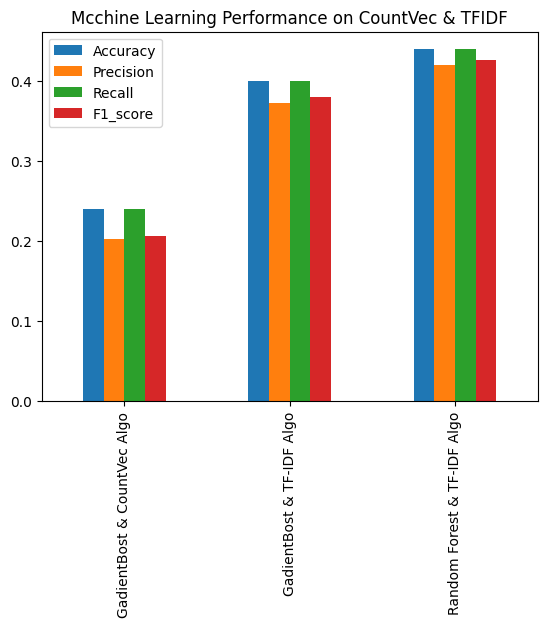

In [46]:
ml_metric_table.plot(kind='bar')
plt.xticks([0,1,2], labels=ml_metric_table.Model)
plt.title('Mcchine Learning Performance on CountVec & TFIDF')
plt.show()

In [47]:
ml_metric_table.to_csv('ml_result.csv')
print('saved as pd file')

saved as pd file


In [48]:
import joblib

joblib.dump(gb, 'gb_onto_model.jb')
joblib.dump(gb_tfidf, 'gb_idfvec_model.jb')
print('model saved')

model saved


In [49]:
# saving vectorizer 
joblib.dump(idf, 'tf_vectorizer.jb')

['tf_vectorizer.jb']

In [50]:
X.shape

(82, 182)

#### DEEP LEARNING FOR ONTOLOGY INFORMATION QUERY SYSTEM

In [51]:
# using TF-Idf ... 

In [51]:
ont_chat_model = tf.keras.Sequential([
    tf.keras.layers.Input((182,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(40, activation='sigmoid')
])

# compile model 
ont_chat_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ont_chat_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)               │ (None, 128)          │      23,424 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 64)           │       8,256 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 40)           │       2,600 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 34,280 (133.91 KB)

 Trainable params: 34,280 (133.91 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# ANN MODEL TRAINING
history  = ont_chat_model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=80)

Epoch 1/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 445ms/step - accuracy: 0.0221 - loss: 3.6885 - val_accuracy: 0.0400 - val_loss: 3.6750
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0234 - loss: 3.6624 - val_accuracy: 0.0400 - val_loss: 3.6650
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1690 - loss: 3.6405 - val_accuracy: 0.0000e+00 - val_loss: 3.6546
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2379 - loss: 3.6140 - val_accuracy: 0.0400 - val_loss: 3.6438
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.3589 - loss: 3.5876 - val_accuracy: 0.0400 - val_loss: 3.6328
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3589 - loss: 3.5616 - val_accuracy: 0.0800 - val_loss: 3.6210
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4148 - loss: 3.5350 - val_accuracy: 0.2400 - val_loss: 3.6086
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4370 - loss: 3.5035 - val_accuracy: 0.2400 - val_loss: 3.

#### ANN MODEL EVALUATION

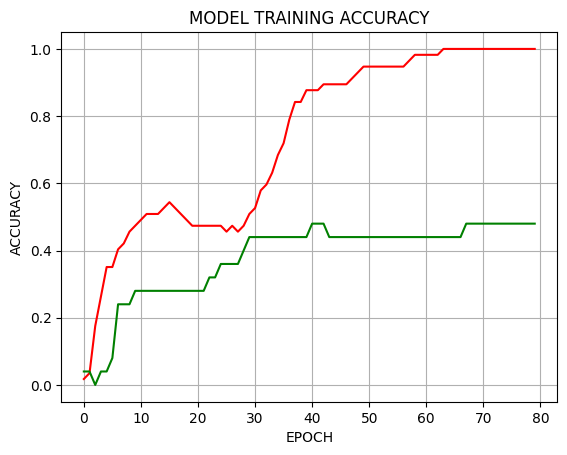

In [53]:
plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('MODEL TRAINING ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.grid()
plt.show()

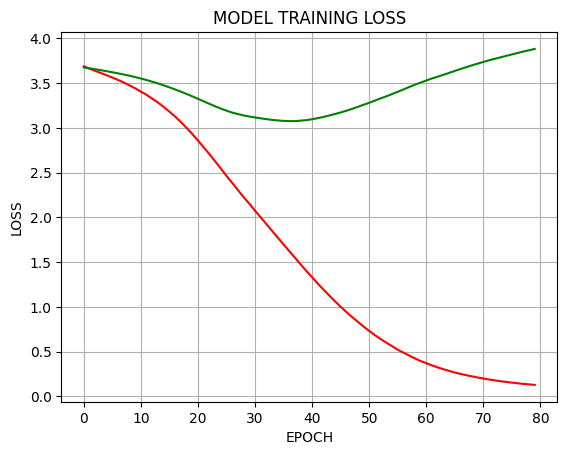

In [54]:
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.title('MODEL TRAINING LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.grid()
plt.show()

In [55]:
feature_matrix

<82x182 sparse matrix of type '<class 'numpy.int64'>'
	with 509 stored elements in Compressed Sparse Row format>

#### SAVING VECTORIZATION, & QUERY MODEL...

In [56]:
ont_chat_model.save('ont_query.h5')
print('model save')

model save


In [57]:
cv

CountVectorizer()

In [58]:
# save vectorization model 
import joblib

In [59]:
joblib.dump(cv, 'vectorizer.jb')

['vectorizer.jb']

In [60]:
# saving vectorizer 
joblib.dump(idf, 'tf_vectorizer.jb')

['tf_vectorizer.jb']

In [61]:
vectorizer = joblib.load('vectorizer.jb')
vectorizer

CountVectorizer()

In [62]:
tf_vectorizer = joblib.load('tf_vectorizer.jb')
tf_vectorizer

TfidfVectorizer()

In [64]:
# vectorizer.vocabulary_

In [63]:
print(vectorizer.vocabulary_)

{'bodi': 18, 'of': 125, 'water': 180, 'accumul': 0, 'quantiti': 147, 'physic': 132, 'measur': 110, 'actual': 1, 'evapotranspir': 68, 'evapor': 67, 'biom': 16, 'bioma': 17, 'contem': 35, 'corpo': 37, 'de': 43, 'agua': 7, 'environment': 60, 'transform': 173, 'agent': 2, 'causa': 20, 'transformacao': 174, 'ambient': 10, 'qualiti': 145, 'chemic': 22, 'concentracao': 33, 'quimicada': 149, 'indic': 96, 'meso': 113, 'regiao': 151, 'micro': 116, 'municipio': 118, 'geopolitica': 90, 'unidad': 177, 'da': 41, 'federacao': 81, 'faz': 80, 'part': 127, 'decorred': 44, 'evento': 70, 'event': 69, 'eventosda': 71, 'inform': 98, 'resourc': 152, 'describ': 47, 'seca': 155, 'dri': 55, 'period': 129, 'space': 158, 'tempor': 169, 'extens': 78, 'eh': 57, 'causado': 21, 'por': 135, 'amostra': 11, 'composta': 29, 'coleta': 25, 'air': 8, 'composto': 30, 'ga': 84, 'agricultur': 4, 'crop': 38, 'cultivo': 39, 'plant': 133, 'biolog': 14, 'commun': 27, 'expansao': 74, 'agropecuaria': 6, 'decorrenteda': 45, 'agricult

In [75]:
dataset.sample(3)

,ont_doc,clean_doc,intent,final_doc,len
28,MicroRegiao fazParteMicroRegiaoMesoRegiao Mes...,micro regiao faz parte micro regiao meso regia...,25,micro regiao faz part micro regiao meso regiao...,59
55,GeographicalExtension poligonoDelimitador Geo...,geographical extension poligono delimitador ge...,19,geograph extens poligono delimitador geograph ...,65
60,Precipitation precipitationDuration SpaceTemp...,precipitation duration space temporal extension,28,precipit durat space tempor extens,47


In [79]:
from nltk.tokenize import word_tokenize
# split input & tokineze text and stem each text
input_text = input('Enter Query: ')
split_text = word_tokenize(input_text)
stem_text = ' '.join([ps.stem(txt) for txt in split_text])
input_features = vectorizer.transform([stem_text]).toarray()
input_features

Enter Query:  fertilizer


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]], dtype=int64)

In [80]:
len(input_features[0])

182

In [81]:
from sklearn.metrics import classification_report

pre = gb.predict(input_features)
print(pre[0])
print(pre,  ' Intention : ', output_converter[pre[0]] )
pulled_information = dataset[dataset.intent == pre[0]]['clean_doc'].tolist()
print('Pulled Result')
pulled_information
# clss_report = classification_report(y, predictions)
# print(clss_report)

39
[39]  Intention :  WaterQuantityPhysicalMeasure
Pulled Result


['water quantity physical measure actual evapotranspiration evaporation',
 'water quantity physical measure water evaporation',
 'water quantity physical measure actual water evaporation',
 'water quantity physical measure groundwaterflow discharge',
 'water quantity physical measure water discharge',
 'water quantity physical measure in conduit discharge',
 'water quantity physical measure potential evaporation',
 'water quantity physical measure stream discharge',
 'water quantity physical measure transpiration evaporation',
 'water quantity physical measure waterflow storm discharge']

In [82]:
dataset[dataset.intent ==39]['clean_doc']

1     water quantity physical measure actual evapotr...
2     water quantity physical measure water evaporation
3     water quantity physical measure actual water e...
31    water quantity physical measure groundwaterflo...
32      water quantity physical measure water discharge
38    water quantity physical measure in conduit dis...
59    water quantity physical measure potential evap...
63     water quantity physical measure stream discharge
76    water quantity physical measure transpiration ...
81    water quantity physical measure waterflow stor...
Name: clean_doc, dtype: object

In [83]:
output_converter

{7: 'BodyOfWater',
 39: 'WaterQuantityPhysicalMeasure',
 6: 'Biome',
 14: 'EnvironmentalTransformationAgent',
 38: 'WaterQualityChemicalMeasure',
 24: 'MesoRegiao',
 25: 'MicroRegiao',
 30: 'RegiaoGeopolitica',
 36: 'UnidadeDaFederacao',
 13: 'EnvironmentalTransformation',
 16: 'Event',
 21: 'InformationResource',
 31: 'Seca',
 4: 'Amostra',
 2: 'Air',
 0: 'AgriculturalCrops',
 17: 'ExpansaoAgropecuaria',
 29: 'Project',
 22: 'Institution',
 10: 'Coleta',
 23: 'ManejoAgricola',
 26: 'Municipio',
 37: 'WaterQualityBiologicalMeasure',
 5: 'BiologicalCommunity',
 1: 'Agriculture',
 20: 'Geopolitics',
 9: 'Clima',
 19: 'GeographicalExtension',
 15: 'EnvironmentalTransformationObject',
 35: 'TemporalDimension',
 27: 'Person',
 34: 'SpacialDimension',
 28: 'Precipitation',
 11: 'DadosMeterologicos',
 18: 'FenomenosMeterologicos',
 12: 'DinamicaUsoeCoberturaDasTerras',
 32: 'SpaceTemporal_Extension',
 33: 'Spacetime',
 8: 'ChemicalWaterIndicator',
 3: 'Altimetrical-BathymetricalExtension'}

In [84]:
X

array([[1, 0, 0, ..., 0, 2, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [85]:
from nltk.corpus import stopwords

stop_word = stopwords.words('english')
print(stop_word)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [86]:
[X[0]]

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 2, 0], dtype=int64)]

In [87]:
max_arg = np.argmax(gb.predict_proba([X[1]]))
confidence = gb.predict_proba([X[0]])[0][6]
confidence

1.042661802575664e-09

In [88]:
import joblib
# ml usage
def load_ml_models(ml_path, vec_path):
    # load machine model and vectorization model
    ml = joblib.load(ml_path)
    vc = joblib.load(vec_path)

    return ml, vc



def ml_prediction(query, ml, vc): 

    
    # feature extraction 
    print(query)
    split_text = word_tokenize(query)
    stem_text = ' '.join([ps.stem(txt) for txt in split_text if txt not in stop_word])
    print(stem_text)
    input_features = vc.transform([stem_text]).toarray()
    print(input_features)
    # maching learning model prediction
    pre = ml.predict(input_features)
    # computing machine learning confidence level 
    max_arg = np.argmax(gb.predict_proba([X[1]]))
    confidence = gb.predict_proba([X[0]])[0][6]
    
    if input_features[0].sum() != 0: 
        print(pre[0])
        intention_code = pre[0]
        intention = output_converter[intention_code] 
        print('Intention: ', intention)
        pulled_information = dataset[dataset.intent == intention_code]['clean_doc'].tolist()
        pulled_information
        print('CONFIDENCE : ', confidence, '%' )
        
        #return the intention code number, text version and list of information that match query... 
        return intention_code, intention, pulled_information
    else:
        print('Initiate Ontology Evolution')

        return 0, 0, 0

print('------------------------------------------------------')
print('ML & Count vectorizer') 
print('------------------------------------------------------')

text = input('Search Query: ')

# ml, vc = load_ml_models('gb_onto_model.jb', 'vectorizer.jb')
# print(ml_prediction(text, ml, vc))

print('------------------------------------------------------')
print('machine TFIDF vectorizer')  
print('------------------------------------------------------')

ml_idf, vc_idf = load_ml_models('gb_idfvec_model.jb', 'tf_vectorizer.jb')
ml_prediction(text, ml_idf, vc_idf)

------------------------------------------------------
ML & Count vectorizer
------------------------------------------------------


Search Query:  what is environmental transformation agent


------------------------------------------------------
machine TFIDF vectorizer
------------------------------------------------------
what is environmental transformation agent
environment transform agent
[[0.         0.         0.64183346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.53150985 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0

(14,
 'EnvironmentalTransformationAgent',
 ['environmental transformation agent causa transformacao ambiental environmental transformation'])

In [96]:
dataset.sample(4)

,ont_doc,clean_doc,intent,final_doc,len
55,GeographicalExtension poligonoDelimitador Geo...,geographical extension poligono delimitador ge...,19,geograph extens poligono delimitador geograph ...,65
21,ExpansaoAgropecuaria ehDecorrentedaAgricultura...,expansao agropecuaria eh decorrenteda agricult...,17,expansao agropecuaria eh decorrenteda agricult...,61
5,EnvironmentalTransformationAgent causa_Transfo...,environmental transformation agent causa trans...,14,environment transform agent causa transformaca...,93
8,MicroRegiao contemMicroRegiaoMunicipio Municipio,micro regiao contem micro regiao municipio,25,micro regiao contem micro regiao municipio,42


### APPLICATION USAGE

In [89]:
import tensorflow as tf
import joblib
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import numpy as np 

ps = PorterStemmer()

# create a funtion to load model, load feature converter and also label converter
def load_ontology_models(model_object, path):
    model = tf.keras.models.load_model(model_object)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # load vectorizer 
    vectorizer = joblib.load(path)
    
    return model, vectorizer

def process_input(query, ont_model, vector):
    # convert query to numberic
    # text = 'body water provide quantity'
    split_text = word_tokenize(query)
    stem_text = ' '.join([ps.stem(txt) for txt in split_text])
    # print(stem_text)
    features = vector.transform([stem_text]).toarray()
    print(features)
    # predict model
    # print(X_input)
    # ANN MODEL
    if features.sum() != 0: 
        prob = model.predict(features)
        # print(prob[0])
        prediction = np.argmax(prob[0])
        print('Prediction:', prediction, ' Max Probability Score:' , prob[0][prediction])
        print('-----------------------------------------------------------------------')
        print(prob)
        # prediction converter 
        user_intention = output_converter[prediction]
        user_intention
    
        pulled_information = dataset[dataset.intent == prediction]['clean_doc'].tolist()
        
        return user_intention, pulled_information
    else:
        print('Ontology Evolution')
        return (0, 0)
    


# get model
model, vect = load_ontology_models('ont_query.h5', 'tf_vectorizer.jb')

# get features
text = input('DL Query: ')
result = process_input(text, model, vect)
result

DL Query:  what is environmental transformation agent


[[0.         0.         0.52886758 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.43796147 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

('EnvironmentalTransformation',
 ['environmental transformation decorrede eventos event',
  'environmental transformation eh causado por agente da transformacao ambiental environmental transformation agent',
  'environmental transformation ocorre em objeto da trasnformacao ambiental environmental transformation object'])

In [85]:
# import nltk
# nltk.download('punkt_tab')
dataset.sample(4)

,ont_doc,clean_doc,intent,final_doc,len
34,BiologicalCommunity hasBiologicalTaxa Biologi...,biological community has biological taxa biolo...,5,biolog commun ha biolog taxa biolog taxa,56
18,Amostra ehCompostaPorColeta Coleta,amostra eh composta por coleta,4,amostra eh composta por coleta,30
58,SpacialDimension possui_Localizacao Localization,spacial dimension possui localizacao localization,34,spacial dimens possui localizacao local,49
15,InformationResource describe Event,information resource describe event,21,inform resourc describ event,35


In [195]:
model = tf.keras.models.load_model('ont_query.h5')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [196]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_9 (Dense)             │ (None, 128)          │      23,424 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_10 (Dense)            │ (None, 64)           │       8,256 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_11 (Dense)            │ (None, 40)           │       2,600 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 34,280 (133.91 KB)

 Trainable params: 34,280 (133.91 KB)

 Non-trainable params: 0 (0.00 B)

In [230]:
import numpy as np

# print(X_input)
prob = model.predict(X_input)
prediction = np.argmax(prob)
print('Prediction: ', prediction)

# prediction converter 
user_intention = output_converter[prediction]
user_intention

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction:  39


(3, 'Altimetrical-BathymetricalExtension')

In [229]:
dataset[dataset.intent == prediction]['clean_doc'].tolist()

['water quantity physical measure actual evapotranspiration evaporation',
 'water quantity physical measure water evaporation',
 'water quantity physical measure actual water evaporation',
 'water quantity physical measure groundwaterflow discharge',
 'water quantity physical measure water discharge',
 'water quantity physical measure in conduit discharge',
 'water quantity physical measure potential evaporation',
 'water quantity physical measure stream discharge',
 'water quantity physical measure transpiration evaporation',
 'water quantity physical measure waterflow storm discharge']

In [66]:
# # clean space... 
# clean = [samp for samp in sample.split(' ') if samp != '']
# print(' '.join(clean))
# clean2 = [samp for samp in ' '.join(clean).split('_')]
# clean2

### ONTOLOGY EVOLUTION FOR EXISTING ONTOLOGY 

In [310]:
import wikipediaapi

# Initialize the API
wiki = wikipediaapi.Wikipedia("ontology_project", "en")  # 'en' for English

# # Get a page, it as to pe a specific word
# page = wiki.page("fertilizer")

# # Check if the page exists
# if page.exists():
#     print("\nTitle:", page.title)
#     print("\nSummary:\n", page.summary[:])  # First 500 characters
#     # print("\nFull Content:\n", page.text[:1000])  # First 1000 characters
# else:
#     print("Page does not exist.")


# build a function version 
def getWiki_content(concept): 
    # Initialize the API
    wiki = wikipediaapi.Wikipedia("ontology_project", "en")  # 'en' for English
    
    # Get a page, it as to pe a specific word
    page = wiki.page(concept)
    
    # Check if the page exists
    if page.exists():
        print("\nTitle:", page.title)
        # print("\nSummary:\n", page.summary[:])  # First 500 characters
        # print("\nFull Content:\n", page.text[:1000])  # First 1000 characters
        return page.summary[:]
    else:
        print("Page does not exist.")
        return ''

# using maize concept first... as a test concept....
wiki_doc = getWiki_content('hoe')
fine_doc = wiki_doc.strip().replace('\n\n',' ').replace('\n', ' ')
fine_doc


Title: Hoe


'Hoe or HOE may refer to: Hoe (food), a Korean dish of raw fish Hoe (letter), a Georgian letter Hoe (tool), a hand tool used in gardening and farming Hoe-farming, a term for primitive forms of agriculture Backhoe, a piece of excavating equipment HOE, pharmaceutical compound number prefix for Hoechst AG'

In [312]:
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

def get_full_predicate(token):
    """
    Build a full predicate phrase including auxiliaries, negations, and complements.
    """
    parts = [token.text]
    # Add auxiliary verbs and modifiers preceding the main verb
    parts.extend(child.text for child in token.children if child.dep_ in {"aux", "auxpass", "neg"})
    # Add complements or prepositional phrases following the main verb
    parts.extend(child.text for child in token.children if child.dep_ in {"prep", "xcomp", "acomp"})
    return " ".join(sorted(parts, key=lambda t: token.i))

def extract_svo_from_sentence(sentence):
    """
    Extract the subject, predicate (verb phrase), and object from a single sentence.
    """
    doc = nlp(sentence)
    subject, predicate, obj = None, None, None

    for token in doc:
        if "subj" in token.dep_:  # Identify the subject
            subject = token.text
        elif "ROOT" in token.dep_:  # Identify the verb (predicate)
            predicate = get_full_predicate(token)
        elif "obj" in token.dep_:  # Identify the object
            obj = token.text
    
    return subject, predicate, obj

def extract_svo_from_document(document):
    """
    Extract all SVO patterns from a multi-sentence document.
    """
    doc = nlp(document)
    results = []

    for sent in doc.sents:  # Iterate over sentences
        svo = extract_svo_from_sentence(sent.text)
        if any(svo):  # Only add non-empty results
            results.append(svo)
    
    return results



# extract SPO from the document....
svo_patterns = extract_svo_from_document(fine_doc)
for idx, (subject, predicate, obj) in enumerate(svo_patterns, 1):
    print(f"Pattern {idx}: Subject: {subject}, Predicate: {predicate}, Object: {obj}")


svo_patterns

Pattern 1: Subject: Hoe, Predicate: refer may to, Object: AG


[('Hoe', 'refer may to', 'AG')]

In [14]:
from nltk.corpus import stopwords

stop_wrd = stopwords.words('english')
print(stop_wrd)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [90]:
import nltk

In [15]:
def filter_patterns_with_stopwords(patterns, intents, stop_words):
    """
    Filters patterns based on intents and ensures the domain and range are not stop words.
    
    Args:
        patterns (list of tuples): List of (subject, predicate, object) patterns.
        intents (list of str): List of intents to filter patterns.
        stop_words (set of str): Set of stop words to exclude from domain or range.
    
    Returns:
        list of tuples: Filtered patterns.
    """
    filtered_patterns = []

    for subject, predicate, obj in patterns:
        # Skip patterns where the predicate is None (relationship must exist)
        if predicate is None:
            continue

        # Ensure subject and object are not in stop words
        if (subject and subject.lower() in stop_words) or (obj and obj.lower() in stop_words):
            continue

        # Check if any part of the pattern matches an intent word
        if any(intent in (subject or "") for intent in intents) or \
           any(intent in predicate for intent in intents) or \
           any(intent in (obj or "") for intent in intents):
            filtered_patterns.append((subject, predicate, obj))

    return filtered_patterns

# Example intents
intents = ['maize']

# Filter patterns
filtered_patterns = filter_patterns_with_stopwords(svo_patterns, intents, stop_wrd)

# Print results
for idx, pattern in enumerate(filtered_patterns, 1):
    print(f"Pattern {idx}: {pattern}")


Pattern 1: ('maize', 'modified is', None)
Pattern 2: ('maize', 'used is As make', 'tortillas')
Pattern 3: ('maize', 'deified is In as', 'sculptures')


In [16]:
def filter_patterns_by_intents(patterns, intents):
    filtered_patterns = []

    for subject, predicate, obj in patterns:
        # Skip patterns containing None
        if None in (subject, predicate, obj):
            continue

        # Check if any part of the pattern matches an intent word
        if any(intent in (subject or "") for intent in intents) or \
           any(intent in (predicate or "") for intent in intents) or \
           any(intent in (obj or "") for intent in intents):
            filtered_patterns.append((subject, predicate, obj))

    return filtered_patterns


# Example intents
intents = ['maize']

# Filter patterns
filtered_patterns = filter_patterns_by_intents(svo_patterns, intents)

# Print results
for idx, pattern in enumerate(filtered_patterns, 1):
    print(f"Pattern {idx}: {pattern}")


Pattern 1: ('maize', 'used is As make', 'tortillas')
Pattern 2: ('maize', 'deified is In as', 'sculptures')


In [27]:
"that" not in stop_wrd

False

### IMPROVED VERSION

In [40]:
import nltk
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

def stem_word(word):
    """
    Stems a word using the Porter Stemmer.
    """
    return stemmer.stem(word.lower())

def filter_patterns_by_stemmed_intents(patterns, intents, stopword):

    # Stem all intents for comparison
    stemmed_intents = {stem_word(intent) for intent in intents}

    filtered_patterns = []

    for subject, predicate, obj in patterns:
        # Skip patterns containing None
        if None in (subject, predicate, obj):
            continue

        # Stem subject, predicate, and object for comparison
        stemmed_subject = stem_word(subject) if subject else ""
        stemmed_predicate = " ".join(stem_word(word) for word in predicate.split()) if predicate else ""
        stemmed_object = stem_word(obj) if obj else ""

        # Check if any stemmed part matches a stemmed intent
        if subject.lower() not in stopword and obj.lower() not in stopword:
            filtered_patterns.append((subject, predicate, obj))
            continue
        if stemmed_subject in stemmed_intents or \
           any(word in stemmed_intents for word in stemmed_predicate.split()) or \
           stemmed_object in stemmed_intents :
            
            filtered_patterns.append((subject, predicate, obj))
            print(subject not in stopword)

    return filtered_patterns


# Example intents
intents = ['maize']

# Filter patterns
filtered_patterns = filter_patterns_by_stemmed_intents(svo_patterns, intents, stop_wrd)

# print(filtered_patterns)

# Print results
for idx, pattern in enumerate(filtered_patterns, 1):
    print(f"Pattern {idx}: {pattern}")

Pattern 1: ('Americans', 'planted alongside', 'polyculture')
Pattern 2: ('ears', 'yield', 'kernels')
Pattern 3: ('varieties', 'be can of', 'colors')
Pattern 4: ('Maize', 'relies on for', 'propagation')
Pattern 5: ('production', 'become has Since with', 'wheat')
Pattern 6: ('varieties', 'called', 'ethanol')
Pattern 7: ('weight', 'produced is than', 'grain')
Pattern 8: ('production', 'was In', '2020')
Pattern 9: ('pests', 'caused have', 'US')
Pattern 10: ('breeding', 'increased has', 'pests')
Pattern 11: ('maize', 'used is As make', 'tortillas')
Pattern 12: ('maize', 'deified is In as', 'sculptures')


In [ ]:
# evolve for ontology evolution
# preprocess for ontology evolution.... 

## Ontology Encoding and Evolution

In [ ]:
# OntologiaEmbrapa_2015-05-30-Copy1

In [6]:
from owlready2 import *

def update_simple_sro_optimized(ontology_path, patterns, output_path):
    """
    Updates an ontology with domain, relationship, and range (SRO) patterns efficiently.
    
    Args:
        ontology_path (str): Path to the input ontology file.
        patterns (list of tuples): List of patterns in the form (domain, relationship, range).
        output_path (str): Path to save the updated ontology.
    """
    # Load the ontology
    onto = get_ontology(ontology_path).load()

    # Pre-cache ontology entities for faster lookup
    existing_classes = {cls.name: cls for cls in onto.classes()}
    existing_properties = {prop.name: prop for prop in onto.properties()}

    with onto:
        for domain, relationship, range_ in patterns:
            # Retrieve or create classes
            if domain in existing_classes:
                domain_class = existing_classes[domain]
            else:
                domain_class = types.new_class(domain, (Thing,))
                existing_classes[domain] = domain_class

            if range_ in existing_classes:
                range_class = existing_classes[range_]
            else:
                range_class = types.new_class(range_, (Thing,))
                existing_classes[range_] = range_class

            # Retrieve or create properties
            if relationship in existing_properties:
                rel_property = existing_properties[relationship]
            else:
                rel_property = types.new_class(relationship, (ObjectProperty,))
                existing_properties[relationship] = rel_property

            # Set domain and range (only if not already set)
            if not rel_property.domain:
                rel_property.domain = [domain_class]
            if not rel_property.range:
                rel_property.range = [range_class]

    # Save the updated ontology
    onto.save(file=output_path, format="rdfxml")
    print(f"Ontology updated and saved to {output_path}")

# Example SRO patterns
patterns = [
    ('Fertilization', 'focusesOn', 'Micronutrients'),
    ('Fertilization', 'originatesFrom', 'Slaughter')
]

# Update ontology
ontology_path = "OntologiaEmbrapa_2015-05-30-Copy1.owl"  # Replace with your OWL file path
output_path = "updated_simple_ontology_optimized.owl"  # File to save the updated ontology
update_simple_sro_optimized(ontology_path, patterns, output_path)

* Owlready2 * Warning: ignoring cyclic type of, involving storid 459



Ontology updated and saved to updated_simple_ontology_optimized.owl


### All in one Usage

In [ ]:
import spacy

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

In [91]:
text = input('Engine : ')

# ================================================== WIKI PEDIA DOC PULLIN SYSTEM   STEP ONE ===========================================

import wikipediaapi

# Initialize the API
wiki = wikipediaapi.Wikipedia("ontology_project", "en")  # 'en' for English
# build a function version 
def getWiki_content(concepts): 
    # Initialize the API
    wiki = wikipediaapi.Wikipedia("ontology_project", "en")  # 'en' for English
    # print(concepts)
    # Get a page, it as to pe a specific word
    concept_corpus = ''
    for concept in concepts:
        page = wiki.page(concept)
        # print('concept ========================= ', concept)
        # Check if the page exists
        if page.exists():
            # print("\nTitle:", page.title)
            # print("\nSummary:\n", page.summary[:])  # First 500 characters
            # print("\nFull Content:\n", page.text[:1000])  # First 1000 characters
            # print('CONCPET : ', concept)
            concept_corpus = concept_corpus + '.' +  page.summary
        else:
            print("Page does not exist.")
            print('CONCPET : ', concept)
            

    print(concept_corpus)
    return concept_corpus

# using maize concept first... as a test concept....
# wiki_doc = getWiki_content('maize')

# ================================================== SPO PATTERN EXTRACTION   STEP TWO ===========================================

import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

def get_full_predicate(token):
    """
    Build a full predicate phrase including auxiliaries, negations, and complements.
    """
    parts = [token.text]
    # Add auxiliary verbs and modifiers preceding the main verb
    parts.extend(child.text for child in token.children if child.dep_ in {"aux", "auxpass", "neg"})
    # Add complements or prepositional phrases following the main verb
    parts.extend(child.text for child in token.children if child.dep_ in {"prep", "xcomp", "acomp"})
    return " ".join(sorted(parts, key=lambda t: token.i))

def extract_svo_from_sentence(sentence):
    """
    Extract the subject, predicate (verb phrase), and object from a single sentence.
    """
    doc = nlp(sentence)
    subject, predicate, obj = None, None, None

    for token in doc:
        if "subj" in token.dep_:  # Identify the subject
            subject = token.text
        elif "ROOT" in token.dep_:  # Identify the verb (predicate)
            predicate = get_full_predicate(token)
        elif "obj" in token.dep_:  # Identify the object
            obj = token.text
    
    return subject, predicate, obj

def extract_svo_from_document(document):
    """
    Extract all SVO patterns from a multi-sentence document.
    """
    doc = nlp(document)
    results = []
    # print('DOCUMENT \n ======================================================== \n', doc)
    for sent in doc.sents:  # Iterate over sentences
        svo = extract_svo_from_sentence(sent.text)
        if any(svo):  # Only add non-empty results
            results.append(svo)
    
    return results


# extract SPO from the document....
# svo_patterns = extract_svo_from_document(wiki_doc)
# for idx, (subject, predicate, obj) in enumerate(svo_patterns, 1):
#     print(f"Pattern {idx}: Subject: {subject}, Predicate: {predicate}, Object: {obj}")

# ================================================== SPO FILTER PATTERN EXTRACTION   STEP THREE ===========================================
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# Initialize the stemmer
stemmer = PorterStemmer()
stop_wrd = stopwords.words('english')

def stem_word(word):
    """
    Stems a word using the Porter Stemmer.
    """
    # print(word, type(word))
    return stemmer.stem(str(word).lower())

def filter_patterns_by_stemmed_intents(patterns, intents, stopword):

    # Stem all intents for comparison
    stemmed_intents = {stem_word(intent) for intent in intents}

    filtered_patterns = []

    for subject, predicate, obj in patterns:
        # Skip patterns containing None
        if None in (subject, predicate, obj):
            continue

        # Stem subject, predicate, and object for comparison
        stemmed_subject = stem_word(subject) if subject else ""
        stemmed_predicate = " ".join(stem_word(word) for word in predicate.split()) if predicate else ""
        stemmed_object = stem_word(obj) if obj else ""

        # Check if any stemmed part matches a stemmed intent
        if subject.lower() not in stop_wrd and obj.lower() not in stop_wrd:
            filtered_patterns.append((subject, predicate, obj))
            continue
        if stemmed_subject in stemmed_intents or \
           any(word in stemmed_intents for word in stemmed_predicate.split()) or \
           stemmed_object in stemmed_intents :
            
            filtered_patterns.append((subject, predicate, obj))
    

    return filtered_patterns


# Example intents
# intents = ['maize']

# # Filter patterns
# filtered_patterns = filter_patterns_by_stemmed_intents(svo_patterns, intents, stop_wrd)

# # print(filtered_patterns)

# # Print results
# for idx, pattern in enumerate(filtered_patterns, 1):
#     print(f"Pattern {idx}: {pattern}")


# ================================================== ONTOLOGY EVOLUTION EXTRACTION   STEP FOUR ===========================================

from owlready2 import *

def update_simple_sro_optimized(ontology_path, patterns, output_path):
    """
    Updates an ontology with domain, relationship, and range (SRO) patterns efficiently.
    
    Args:
        ontology_path (str): Path to the input ontology file.
        patterns (list of tuples): List of patterns in the form (domain, relationship, range).
        output_path (str): Path to save the updated ontology.
    """
    # Load the ontology
    onto = get_ontology(ontology_path).load()

    # Pre-cache ontology entities for faster lookup
    existing_classes = {cls.name: cls for cls in onto.classes()}
    existing_properties = {prop.name: prop for prop in onto.properties()}

    with onto:
        for domain, relationship, range_ in patterns:
            # Retrieve or create classes
            if domain in existing_classes:
                domain_class = existing_classes[domain]
            else:
                domain_class = types.new_class(domain, (Thing,))
                existing_classes[domain] = domain_class

            if range_ in existing_classes:
                range_class = existing_classes[range_]
            else:
                range_class = types.new_class(range_, (Thing,))
                existing_classes[range_] = range_class

            # Retrieve or create properties
            if relationship in existing_properties:
                rel_property = existing_properties[relationship]
            else:
                rel_property = types.new_class(relationship, (ObjectProperty,))
                existing_properties[relationship] = rel_property

            # Set domain and range (only if not already set)
            if not rel_property.domain:
                rel_property.domain = [domain_class]
            if not rel_property.range:
                rel_property.range = [range_class]

    # Save the updated ontology
    onto.save(file=output_path, format="rdfxml")
    print(f"Ontology updated and saved to {output_path}")

# Example SRO patterns
# patterns = [
#     ('Fertilization', 'focusesOn', 'Micronutrients'),
#     ('Fertilization', 'originatesFrom', 'Slaughter')
# ]

# Update ontology
# ontology_path = "OntologiaEmbrapa_2015-05-30-Copy1.owl"  # Replace with your OWL file path
# output_path = "updated_simple_ontology_optimized.owl"  # File to save the updated ontology
# update_simple_sro_optimized(ontology_path, patterns, output_path)


# ================================================== QUERY SYSTEM ===========================================
import joblib
# ml usage
def load_ml_models(ml_path, vec_path):
    # load machine model and vectorization model
    ml = joblib.load(ml_path)
    vc = joblib.load(vec_path)

    return ml, vc



def ml_prediction(query, ml, vc): 
    
    # feature extraction 
    print(query)
    split_text = word_tokenize(query)
    stem_text = ' '.join([ps.stem(txt) for txt in split_text if txt not in stop_word])
    print(stem_text)
    input_features = vc.transform([stem_text]).toarray()
    print(input_features)
    # maching learning model prediction
    pre = ml.predict(input_features)
    # computing machine learning confidence level 
    max_arg = np.argmax(gb.predict_proba(input_features))
    confidence = gb.predict_proba(input_features)[0][max_arg]
    
    if input_features[0].sum() != 0: 
        print(pre[0])
        intention_code = pre[0]
        intention = output_converter[intention_code] 
        print('Intention: ', intention)
        pulled_information = dataset[dataset.intent == intention_code]['clean_doc'].tolist()
        pulled_information
        print('CONFIDENCE : ', confidence, '%' )
        
        #return the intention code number, text version and list of information that match query... 
        # print(pulled_information)
        return query,  pulled_information
    else:
        print('Initiate Ontology Evolution')
        canditate_terms = ' '.join([txt for txt in split_text if txt not in stop_wrd])
        doc = nlp(canditate_terms)
        filtered_term = [d for d in doc if d.pos_ == 'NOUN']
        print(filtered_term)

        print("\n\n============================== DOC EXTRACTION ============================================")
        # passes the term to wiki pedia document pulling
        wiki_doc = getWiki_content(filtered_term[:])
        # pattern filtering (SPO collection)

        print("\n\n============================== SPO EXTRACTION ============================================\n")
        svo_patterns = extract_svo_from_document(wiki_doc)
        for idx, (subject, predicate, obj) in enumerate(svo_patterns, 1):
            print(f"Pattern {idx}: Subject: {subject}, Predicate: {predicate}, Object: {obj}")

        
        print("\n\n============================== SPO FILTER EXTRACTION ============================================\n")
        # Filter patterns
        intents = filtered_term
        print('intents', intents)
        filtered_patterns = filter_patterns_by_stemmed_intents(svo_patterns, intents, stop_wrd)
        # Print results
        for idx, pattern in enumerate(filtered_patterns, 1):
            print(f"Pattern {idx}: {pattern}")

        print("\n\n============================== ONTOLOGY EVOLUTION  ============================================\n")
        # print(filtered_patterns)
        ontology_path = "evolved_macconto.owl"  # Replace with your OWL file path
        output_path = "evolved_macconto.owl"  # File to save the updated ontology
        update_simple_sro_optimized(ontology_path, filtered_patterns, output_path)
        
        return 0 , 0

print('------------------------------------------------------')
print('machine TFIDF vectorizer')  
print('------------------------------------------------------')

ml_idf, vc_idf = load_ml_models('gb_idfvec_model.jb', 'tf_vectorizer.jb')
que, pull_info = ml_prediction(text, ml_idf, vc_idf)
pull_info
# is hoe use to dig maize
# what is evapotranspiration
# how to perform maize irrigation

Engine :  what is environmental transformation agent


------------------------------------------------------
machine TFIDF vectorizer
------------------------------------------------------
what is environmental transformation agent
environment transform agent
[[0.         0.         0.64183346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.53150985 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0

['environmental transformation agent causa transformacao ambiental environmental transformation']

### EVALUATION PROGRAM

In [393]:
from nltk.stem import PorterStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


# Download NLTK resources if needed
nltk.download('punkt')

def stem_text(text):
    """
    Stems the words in the input text using the Porter Stemmer.
    
    Args:
        text (str): The input text to stem.
        
    Returns:
        list: A list of stemmed words.
    """
    stemmer = PorterStemmer()
    words = text.lower().split()
    return [stemmer.stem(word) for word in words]

def compute_relevance(input_text, pulled_document, min_match_count=2):
    """
    Computes the relevance of the input text to the pulled document.

    Args:
        input_text (str): The input string to analyze.
        pulled_document (list): A list of sentences representing the pulled document.
        min_match_count (int): The minimum number of matching terms required for a document to be considered relevant.

    Returns:
        dict: A dictionary containing the relevance percentage, 
              total count of sentences, relevant sentence count, and relevant sentences list.
    """
    # Stem the input text
    input_words = set(stem_text(input_text))
    
    # Total number of sentences in the pulled document
    total_sentences = len(pulled_document)
    
    # Initialize counters and relevant sentences list
    relevant_sentences_count = 0
    relevant_sentences = []
    
    # Loop through each sentence in the pulled document
    for sentence in pulled_document:
        # Stem each sentence in the document
        sentence_words = set(stem_text(sentence))
        
        # Find the intersection between input text words and sentence words
        matching_words = input_words & sentence_words
        
        # If there are at least 'min_match_count' matching words, consider it relevant
        if len(matching_words) >= min_match_count:
            relevant_sentences_count += 1
            relevant_sentences.append(sentence)
    
    # Compute the relevance percentage
    if total_sentences > 0:
        relevance_percentage = (relevant_sentences_count / total_sentences) * 100
    else:
        relevance_percentage = 0
    
    # Return the structured result
    return {
        "relevance_percentage": round(relevance_percentage, 2),
        "total_sentences": total_sentences,
        "relevant_sentences_count": relevant_sentences_count,
        "relevant_sentences": relevant_sentences,
    }

# Example input text and pulled document
input_text = "what is water evaporation"
pulled_document = [
    'water quantity physical measure actual evapotranspiration evaporation',
    'water quantity physical measure water evaporation',
    'water quantity physical measure actual water evaporation',
    'water quantity physical measure groundwaterflow discharge',
    'water quantity physical measure water discharge',
    'water quantity physical measure in conduit discharge',
    'water quantity physical measure potential evaporation',
    'water quantity physical measure stream discharge',
    'water quantity physical measure transpiration evaporation',
    'water quantity physical measure waterflow storm discharge'
]

# Compute relevance
result = compute_relevance(input_text, pulled_document)
result


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'relevance_percentage': 50.0,
 'total_sentences': 10,
 'relevant_sentences_count': 5,
 'relevant_sentences': ['water quantity physical measure actual evapotranspiration evaporation',
  'water quantity physical measure water evaporation',
  'water quantity physical measure actual water evaporation',
  'water quantity physical measure potential evaporation',
  'water quantity physical measure transpiration evaporation']}

In [385]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_relevance(input_text, pulled_document, threshold=0.1):
    """
    Computes the relevance of the input text to the pulled document using TF-IDF and calculates the mean relevance of the input words.

    Args:
        input_text (str): The input string to analyze.
        pulled_document (list): A list of sentences representing the pulled document.
        threshold (float): Threshold for considering a document as relevant based on mean relevance score.

    Returns:
        dict: A dictionary containing the mean relevance percentage, 
              total count of sentences, relevant sentence count, and relevant sentences list.
    """
    # Tokenize and normalize input text
    input_words = input_text.lower().split()
    
    # Combine input text and pulled document for TF-IDF processing
    documents = [input_text] + pulled_document

    # Calculate TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # The first vector is for the input text, the rest are for the document sentences
    input_vector = tfidf_matrix[0]
    document_vectors = tfidf_matrix[1:]

    # Initialize variables for calculating relevance
    relevant_sentences = []
    relevant_sentences_count = 0
    total_sentences = len(pulled_document)
    
    # Loop through each sentence in the pulled document
    for i, sentence_vector in enumerate(document_vectors):
        # Calculate the relevance for each word in the input text
        total_relevance = 0
        word_count = 0
        for word in input_words:
            word_index = vectorizer.vocabulary_.get(word)
            if word_index is not None:
                word_relevance = sentence_vector[0, word_index]
                total_relevance += word_relevance
                word_count += 1

        # Calculate the mean relevance score for the sentence
        if word_count > 0:
            mean_relevance_score = total_relevance / word_count
        else:
            mean_relevance_score = 0
        
        # If the mean relevance score exceeds the threshold, consider the sentence relevant
        if mean_relevance_score > threshold:
            relevant_sentences.append(pulled_document[i])
            relevant_sentences_count += 1

    # Compute the average relevance percentage
    relevance_percentage = (relevant_sentences_count / total_sentences) * 100 if total_sentences > 0 else 0
    
    # Return the structured result
    return {
        "relevance_percentage": round(relevance_percentage, 2),
        "total_sentences": total_sentences,
        "relevant_sentences_count": relevant_sentences_count,
        "relevant_sentences": relevant_sentences,
    }

# Input text and pulled document


# Compute relevance
result = compute_relevance(que, pull_info)
result

{'relevance_percentage': 0.0,
 'total_sentences': 3,
 'relevant_sentences_count': 0,
 'relevant_sentences': []}

In [390]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
from nltk.stem import PorterStemmer

# Download NLTK resources if needed
# nltk.download('punkt')

def stem_text(text):
    """
    Stems the words in the input text using the Porter Stemmer.
    
    Args:
        text (str): The input text to stem.
        
    Returns:
        str: Stemming version of the input text.
    """
    stemmer = PorterStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def compute_relevance(input_text, pulled_document, threshold=0.1):
    """
    Computes the relevance of the input text to the pulled document using TF-IDF and calculates the mean relevance of the input words.

    Args:
        input_text (str): The input string to analyze.
        pulled_document (list): A list of sentences representing the pulled document.
        threshold (float): Threshold for considering a document as relevant based on mean relevance score.

    Returns:
        dict: A dictionary containing the mean relevance percentage, 
              total count of sentences, relevant sentence count, and relevant sentences list.
    """
    # Stem the input text
    stemmed_input_text = stem_text(input_text)
    
    # Stem each sentence in the pulled document
    stemmed_document = [stem_text(sentence) for sentence in pulled_document]
    
    # Combine stemmed input text and document for TF-IDF processing
    documents = [stemmed_input_text] + stemmed_document

    # Calculate TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # The first vector is for the input text, the rest are for the document sentences
    input_vector = tfidf_matrix[0]
    document_vectors = tfidf_matrix[1:]

    # Initialize variables for calculating relevance
    relevant_sentences = []
    relevant_sentences_count = 0
    total_sentences = len(pulled_document)
    
    # Loop through each sentence in the pulled document
    for i, sentence_vector in enumerate(document_vectors):
        # Calculate the relevance for each word in the input text
        total_relevance = 0
        word_count = 0
        for word in stemmed_input_text.split():
            word_index = vectorizer.vocabulary_.get(word)
            if word_index is not None:
                word_relevance = sentence_vector[0, word_index]
                total_relevance += word_relevance
                word_count += 1

        # Calculate the mean relevance score for the sentence
        if word_count > 0:
            mean_relevance_score = total_relevance / word_count
        else:
            mean_relevance_score = 0
        
        # If the mean relevance score exceeds the threshold, consider the sentence relevant
        if mean_relevance_score > threshold:
            relevant_sentences.append(pulled_document[i])
            relevant_sentences_count += 1

    # Compute the average relevance percentage
    relevance_percentage = (relevant_sentences_count / total_sentences) * 100 if total_sentences > 0 else 0
    
    # Return the structured result
    return {
        "relevance_percentage": round(relevance_percentage, 2),
        "total_sentences": total_sentences,
        "relevant_sentences_count": relevant_sentences_count,
        "relevant_sentences": relevant_sentences,
    }


# Compute relevance
result = compute_relevance(que, pull_info)
result

{'relevance_percentage': 0.0,
 'total_sentences': 3,
 'relevant_sentences_count': 0,
 'relevant_sentences': []}